In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\david\anaconda3\envs\Dsci\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 30)

In [3]:
def df_from_VanExcelFiles(file_name):
    file = pd.ExcelFile(file_name)
    name = 'Sheet1'
    df = file.parse(name, header=1)
    df['Year'] = file_name[12:16]
    return df

In [4]:
os.chdir('data/BC_Ptax/')
files = os.listdir()
excel_files = [file for file in files if '.xls' in file]

In [5]:
bc_ptax05_22 = pd.concat([df_from_VanExcelFiles(xl) for xl in excel_files])

In [6]:
bc_ptax05_22.head(2)

,Municipalities,Type,RD,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Year,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
0,100 Mile House,D,CAR,Municipal,5.53707,40.00000,55.00000,8.61977,9.27090,9.68988,3.70597,2.74646,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100 Mile House,D,CAR,Reg'l District,1.83740,5.21621,5.63919,5.63919,4.06353,5.51221,2.07189,2.25099,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bc_ptax05_22.tail(2)

,Municipalities,Type,RD,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Year,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
964,Zeballos,V,STR,Other,0.3443,1.5492,NaN,1.1557,0.8617,1.1637,0.3443,NaN,2022,0.1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5183,0.3443
965,Zeballos,V,STR,Totals,15.1785,55.0051,NaN,48.9596,28.9703,3.0637,14.0132,NaN,2022,0.2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0383,7.3243


In [8]:
bc_ptax05_22.columns

Index(['Municipalities', 'Type', 'RD', 'Purpose of Tax Rate', 'Residential',
       'Utilities', 'Major Industry', 'Light Industry', 'Business',
       'Managed Forest Land', 'Recreation Non-Profit', 'Farm', 'Year',
       'Supportive Housing', 'Major Industry*', 'Light Industry*', 'Farm*',
       'Municipalities**', 'Municipalities1', 'Major Industry2', 'Farm2',
       'Major Industry1', 'Farm1'],
      dtype='object')

In [9]:
bc_ptax05_22 = bc_ptax05_22[['Year', 'Type', 'RD', 'Municipalities', 'Purpose of Tax Rate','Residential','Utilities',
                             'Major Industry', 'Light Industry', 'Business', 'Managed Forest Land','Recreation Non-Profit', 'Farm', 'Supportive Housing','Major Industry*', 'Light Industry*', 'Farm*', 'Municipalities**','Municipalities1', 'Major Industry2', 'Farm2', 'Major Industry1','Farm1']]

In [10]:
bc_ptax05_22['Year'] = bc_ptax05_22['Year'].apply(pd.to_numeric)

In [11]:
bc_ptax05_22.isna().sum()

Year                         0
Type                         0
RD                          78
Municipalities            1932
Purpose of Tax Rate          0
Residential                  4
Utilities                    3
Major Industry           13560
Light Industry            4833
Business                     3
Managed Forest Land          3
Recreation Non-Profit        3
Farm                     11628
Supportive Housing        3783
Major Industry*          12510
Light Industry*          12510
Farm*                    14442
Municipalities**         16374
Municipalities1          16374
Major Industry2          16374
Farm2                    16374
Major Industry1           9579
Farm1                     9579
dtype: int64

In [12]:
bc_ptax05_22[bc_ptax05_22['Residential'].isna()]

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
318,2020,V,EKO,Jumbo Glacier,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,2020,V,EKO,Jumbo Glacier,Reg'l District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2020,V,EKO,Jumbo Glacier,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,2020,V,EKO,Jumbo Glacier,School,NaN,13.03,NaN,1.0561,1.107,0.0001,0.7844,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,7.05


In [13]:
bc_ptax05_22[bc_ptax05_22['Business'].isna()]

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
318,2020,V,EKO,Jumbo Glacier,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,2020,V,EKO,Jumbo Glacier,Reg'l District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2020,V,EKO,Jumbo Glacier,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bc_ptax05_22[bc_ptax05_22['Residential'].isna()]

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
318,2020,V,EKO,Jumbo Glacier,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,2020,V,EKO,Jumbo Glacier,Reg'l District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2020,V,EKO,Jumbo Glacier,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,2020,V,EKO,Jumbo Glacier,School,NaN,13.03,NaN,1.0561,1.107,0.0001,0.7844,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,7.05


In [15]:
bc_ptax05_22[bc_ptax05_22.columns.difference(['Year'])].isnull().groupby(bc_ptax05_22.Year).sum().astype(int)

,Business,Farm,Farm*,Farm1,Farm2,Light Industry,Light Industry*,Major Industry,Major Industry*,Major Industry1,Major Industry2,Managed Forest Land,Municipalities,Municipalities**,Municipalities1,Purpose of Tax Rate,RD,Recreation Non-Profit,Residential,Supportive Housing,Type,Utilities
Year,,,,,,,,,,,,,,,,,,,,,,
2005,0,0,936,936,936,0,936,0,936,936,936,0,0,936,936,0,0,0,0,936,0,0
2006,0,0,942,942,942,0,942,0,942,942,942,0,0,942,942,0,0,0,0,942,0,0
2007,0,0,942,942,942,0,942,0,942,942,942,0,0,942,942,0,0,0,0,942,0,0
2008,0,0,960,960,960,0,960,0,960,960,960,0,0,960,960,0,0,0,0,960,0,0
2009,0,0,966,966,966,966,0,966,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2010,0,0,966,966,966,966,0,966,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2011,0,966,0,966,966,966,0,966,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2012,0,966,0,966,966,966,0,966,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2013,0,966,0,966,966,966,0,966,0,966,966,0,966,0,966,0,6,0,0,0,0,0


In [16]:
bc_ptax05_22[(bc_ptax05_22['Municipalities**'] == 'Vancouver') & (bc_ptax05_22['Year'] == 2013)].head(2)

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
888,2013,C,GVR,NaN,Municipal,1.89502,36.36144,NaN,NaN,8.20424,0.0,1.81589,NaN,0.00000,32.98091,8.20424,1.81589,Vancouver,NaN,NaN,NaN,NaN,NaN
889,2013,C,GVR,NaN,Reg'l District,0.06155,0.21543,NaN,NaN,0.15080,0.0,0.06155,NaN,0.06155,0.20927,0.20927,0.06155,Vancouver,NaN,NaN,NaN,NaN,NaN


In [17]:
replace2009_10 = ['Major Industry', 'Light Industry']
with2009_10 = ['Major Industry*', 'Light Industry*']

replace2011_12 = ['Major Industry','Light Industry', 'Farm']
with2011_12 = ['Major Industry*','Light Industry*', 'Farm*']

replace2013 = ['Municipalities', 'Major Industry', 'Light Industry', 'Farm']
with2013 = ['Municipalities**', 'Major Industry*', 'Light Industry*', 'Farm*']

replace2014 = ['Municipalities','Major Industry', 'Farm']
with2014 = ['Municipalities1', 'Major Industry2', 'Farm2']

replace2015_2022 = ['Major Industry', 'Farm']
with2015_2022 = ['Major Industry1', 'Farm1']

#for item in replace

In [18]:
def replace_column(df, year,replace_data,with_data):
    count = 0
    while count < len(replace_data):
        df.loc[df['Year'] == year, replace_data[count]] = df.loc[df['Year'] == year, with_data[count]]
        count += 1

In [19]:
years = [2009,2010]
for year in years:
    replace_column(bc_ptax05_22, year, replace2009_10, with2009_10)

In [20]:
years = [2011,2012]
for year in years:
    replace_column(bc_ptax05_22, year, replace2011_12, with2011_12)

In [21]:
replace_column(bc_ptax05_22, 2013, replace2013, with2013)

In [22]:
replace_column(bc_ptax05_22, 2014, replace2014, with2014 )

In [23]:
years = [2015,2016,2017,2018,2019,2020,2021,2022]
for year in years:
    replace_column(bc_ptax05_22,year,replace2015_2022, with2015_2022)

In [24]:
bc_ptax05_22[(bc_ptax05_22['Municipalities'] == 'Vancouver') & (bc_ptax05_22['Year'] == 2012)].head(2)

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing,Major Industry*,Light Industry*,Farm*,Municipalities**,Municipalities1,Major Industry2,Farm2,Major Industry1,Farm1
888,2012,C,GVR,Vancouver,Municipal,2.02002,38.31904,31.98356,8.78096,8.78096,0.0,1.79591,1.79591,0.00000,31.98356,8.78096,1.79591,NaN,NaN,NaN,NaN,NaN,NaN
889,2012,C,GVR,Vancouver,Reg'l District,0.06341,0.22192,0.21558,0.21558,0.15535,0.0,0.06341,0.06341,0.06341,0.21558,0.21558,0.06341,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
bc_ptax05_22[bc_ptax05_22.columns.difference(['Year'])].isnull().groupby(bc_ptax05_22.Year).sum().astype(int)

,Business,Farm,Farm*,Farm1,Farm2,Light Industry,Light Industry*,Major Industry,Major Industry*,Major Industry1,Major Industry2,Managed Forest Land,Municipalities,Municipalities**,Municipalities1,Purpose of Tax Rate,RD,Recreation Non-Profit,Residential,Supportive Housing,Type,Utilities
Year,,,,,,,,,,,,,,,,,,,,,,
2005,0,0,936,936,936,0,936,0,936,936,936,0,0,936,936,0,0,0,0,936,0,0
2006,0,0,942,942,942,0,942,0,942,942,942,0,0,942,942,0,0,0,0,942,0,0
2007,0,0,942,942,942,0,942,0,942,942,942,0,0,942,942,0,0,0,0,942,0,0
2008,0,0,960,960,960,0,960,0,960,960,960,0,0,960,960,0,0,0,0,960,0,0
2009,0,0,966,966,966,0,0,0,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2010,0,0,966,966,966,0,0,0,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2011,0,0,0,966,966,0,0,0,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2012,0,0,0,966,966,0,0,0,0,966,966,0,0,966,966,0,6,0,0,0,0,0
2013,0,0,0,966,966,0,0,0,0,966,966,0,0,0,966,0,6,0,0,0,0,0


In [26]:
bc_ptax05_22.columns

Index(['Year', 'Type', 'RD', 'Municipalities', 'Purpose of Tax Rate',
       'Residential', 'Utilities', 'Major Industry', 'Light Industry',
       'Business', 'Managed Forest Land', 'Recreation Non-Profit', 'Farm',
       'Supportive Housing', 'Major Industry*', 'Light Industry*', 'Farm*',
       'Municipalities**', 'Municipalities1', 'Major Industry2', 'Farm2',
       'Major Industry1', 'Farm1'],
      dtype='object')

In [27]:
bc_ptax05_22.drop(columns=['Major Industry*', 'Light Industry*', 'Farm*', 'Municipalities**', 'Municipalities1', 'Major Industry2', 'Farm2', 'Major Industry1', 'Farm1'], inplace=True)

In [37]:
bc_ptax05_22.head(6)

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing
0,2005,D,CAR,100 Mile House,Municipal,0.005537,0.040000,0.055000,0.008620,0.009271,0.009690,0.003706,0.002746,NaN
1,2005,D,CAR,100 Mile House,Reg'l District,0.001837,0.005216,0.005639,0.005639,0.004064,0.005512,0.002072,0.002251,NaN
2,2005,D,CAR,100 Mile House,Hospital,0.000752,0.002632,0.002557,0.002557,0.001842,0.000000,0.000752,0.000752,NaN
3,2005,D,CAR,100 Mile House,School,0.005008,0.014900,0.012500,0.009600,0.009600,0.002300,0.004500,0.006800,NaN
4,2005,D,CAR,100 Mile House,Other,0.000092,0.000524,0.000524,0.000286,0.000286,0.000321,0.000092,0.000092,NaN
5,2005,D,CAR,100 Mile House,Total,0.013226,0.063273,0.076220,0.026702,0.025063,0.017823,0.011122,0.012642,NaN


In [29]:
bc_ptax05_22.iloc[:,5:] = bc_ptax05_22.iloc[:,5:] * 0.001

In [30]:
bc_ptax05_22[(bc_ptax05_22['Municipalities'] == 'North Vancouver') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

,Year,Type,RD,Municipalities,Purpose of Tax Rate,Residential,Utilities,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,Supportive Housing
540,2012,D,GVR,North Vancouver,Municipal,0.002364,0.04,0.041171,0.019528,0.008538,0.0,0.006074,0.0,0.0
546,2017,D,GVR,North Vancouver,Municipal,0.001607,0.04,0.028408,0.010451,0.007070,0.0,0.004785,0.0,0.0
546,2018,D,GVR,North Vancouver,Municipal,0.001593,0.04,0.023446,0.007721,0.005599,0.0,0.004472,0.0,0.0
546,2019,D,GVR,North Vancouver,Municipal,0.001661,0.04,0.022366,0.007094,0.004628,0.0,0.004143,0.0,0.0


In [31]:
bc_ptax05_22[bc_ptax05_22['Year'] == 2008]['Municipalities'].unique()

array(['100 Mile House', 'Abbotsford ', 'Abbotsford', 'Alert Bay',
       'Anmore', 'Armstrong', 'Ashcroft', 'Barriere', 'Belcarra',
       'Bowen Island', 'Burnaby', 'Burns Lake', 'Cache Creek',
       'Campbell River', 'Canal Flats', 'Castlegar', 'Central Saanich',
       'Chase', 'Chetwynd', 'Chilliwack', 'Clearwater', 'Clinton',
       'Coldstream', 'Colwood', 'Comox', 'Coquitlam', 'Courtenay',
       'Cranbrook', 'Creston', 'Cumberland', 'Dawson Creek', 'Delta',
       'Duncan', 'Elkford', 'Enderby', 'Esquimalt', 'Fernie',
       'Fort Nelson', 'Fort St. James', 'Fort St. John', 'Fraser Lake',
       'Fruitvale', 'Gibsons', 'Gold River', 'Golden', 'Grand Forks',
       'Granisle', 'Greenwood', 'Harrison Hot Springs', 'Hazelton',
       'Highlands', 'Hope', 'Houston', "Hudson's Hope", 'Invermere',
       'Kamloops', 'Kaslo', 'Kelowna', 'Kent', 'Keremeos', 'Kimberley',
       'Kitimat', 'Ladysmith', 'Lake Country', 'Lake Cowichan',
       'Langford', 'Langley', 'Langley ', 'Lantzvil

In [32]:
bc_ptax05_22['Municipalities'] = bc_ptax05_22['Municipalities'].str.strip()

In [33]:
cities = ['North Vancouver', 'Langley']

for city in cities:
    bc_ptax05_22.loc[bc_ptax05_22['Municipalities'] == city +' - **', 'Municipalities'] = city
for city in cities:
    bc_ptax05_22.loc[(bc_ptax05_22['Municipalities'] == city) & (bc_ptax05_22['Type'] == 'D'), 'Municipalities'] = city + ' - D'
for city in cities:
    bc_ptax05_22.loc[bc_ptax05_22['Municipalities'] == city +' - C', 'Municipalities'] = city

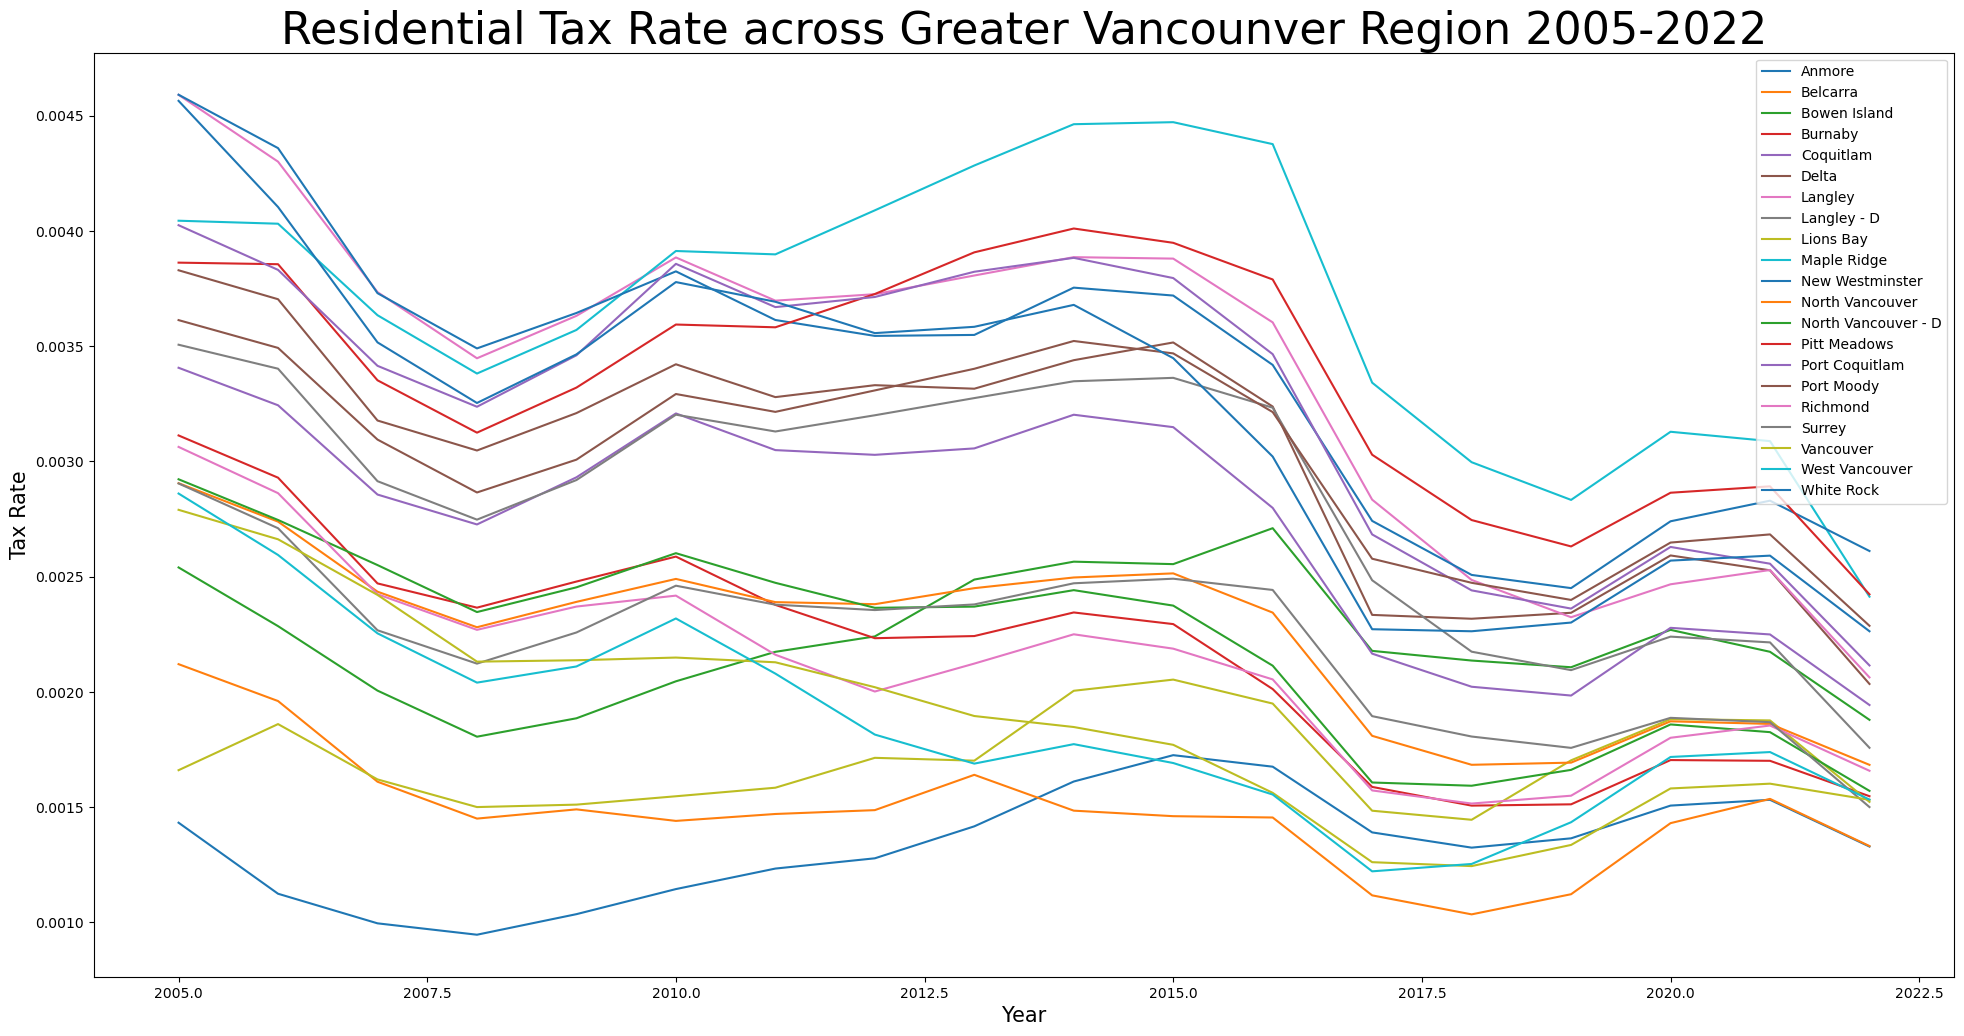

In [34]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = bc_ptax05_22[bc_ptax05_22['RD'] == 'GVR']['Municipalities'].unique()

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Residential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate across Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()


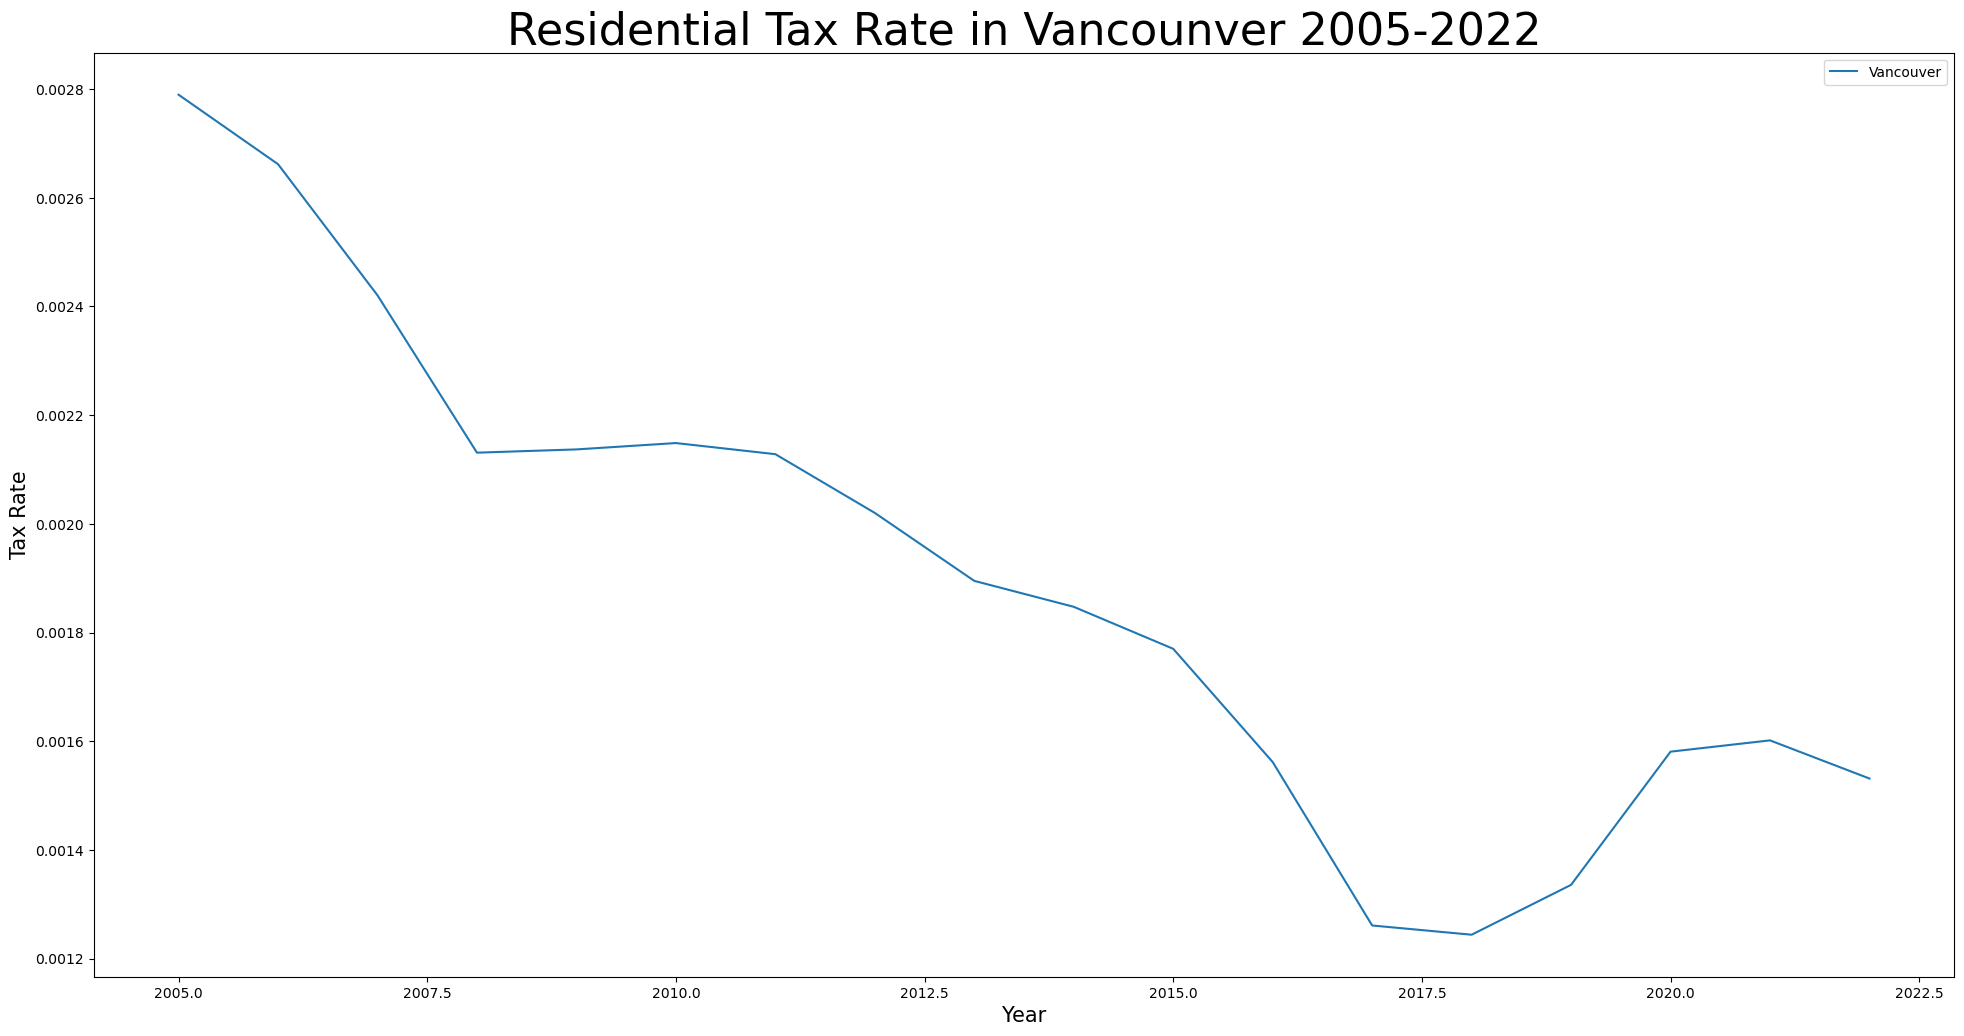

In [35]:
data=bc_ptax05_22[(bc_ptax05_22['Municipalities'] == 'Vancouver') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')][['Year', 'Residential']]

plt.figure(figsize=(24,12))
plt.plot(data.iloc[:, 0], data.iloc[:,1], label='Vancouver')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate in Vancounver 2005-2022', fontsize=32)
plt.legend()
plt.show()

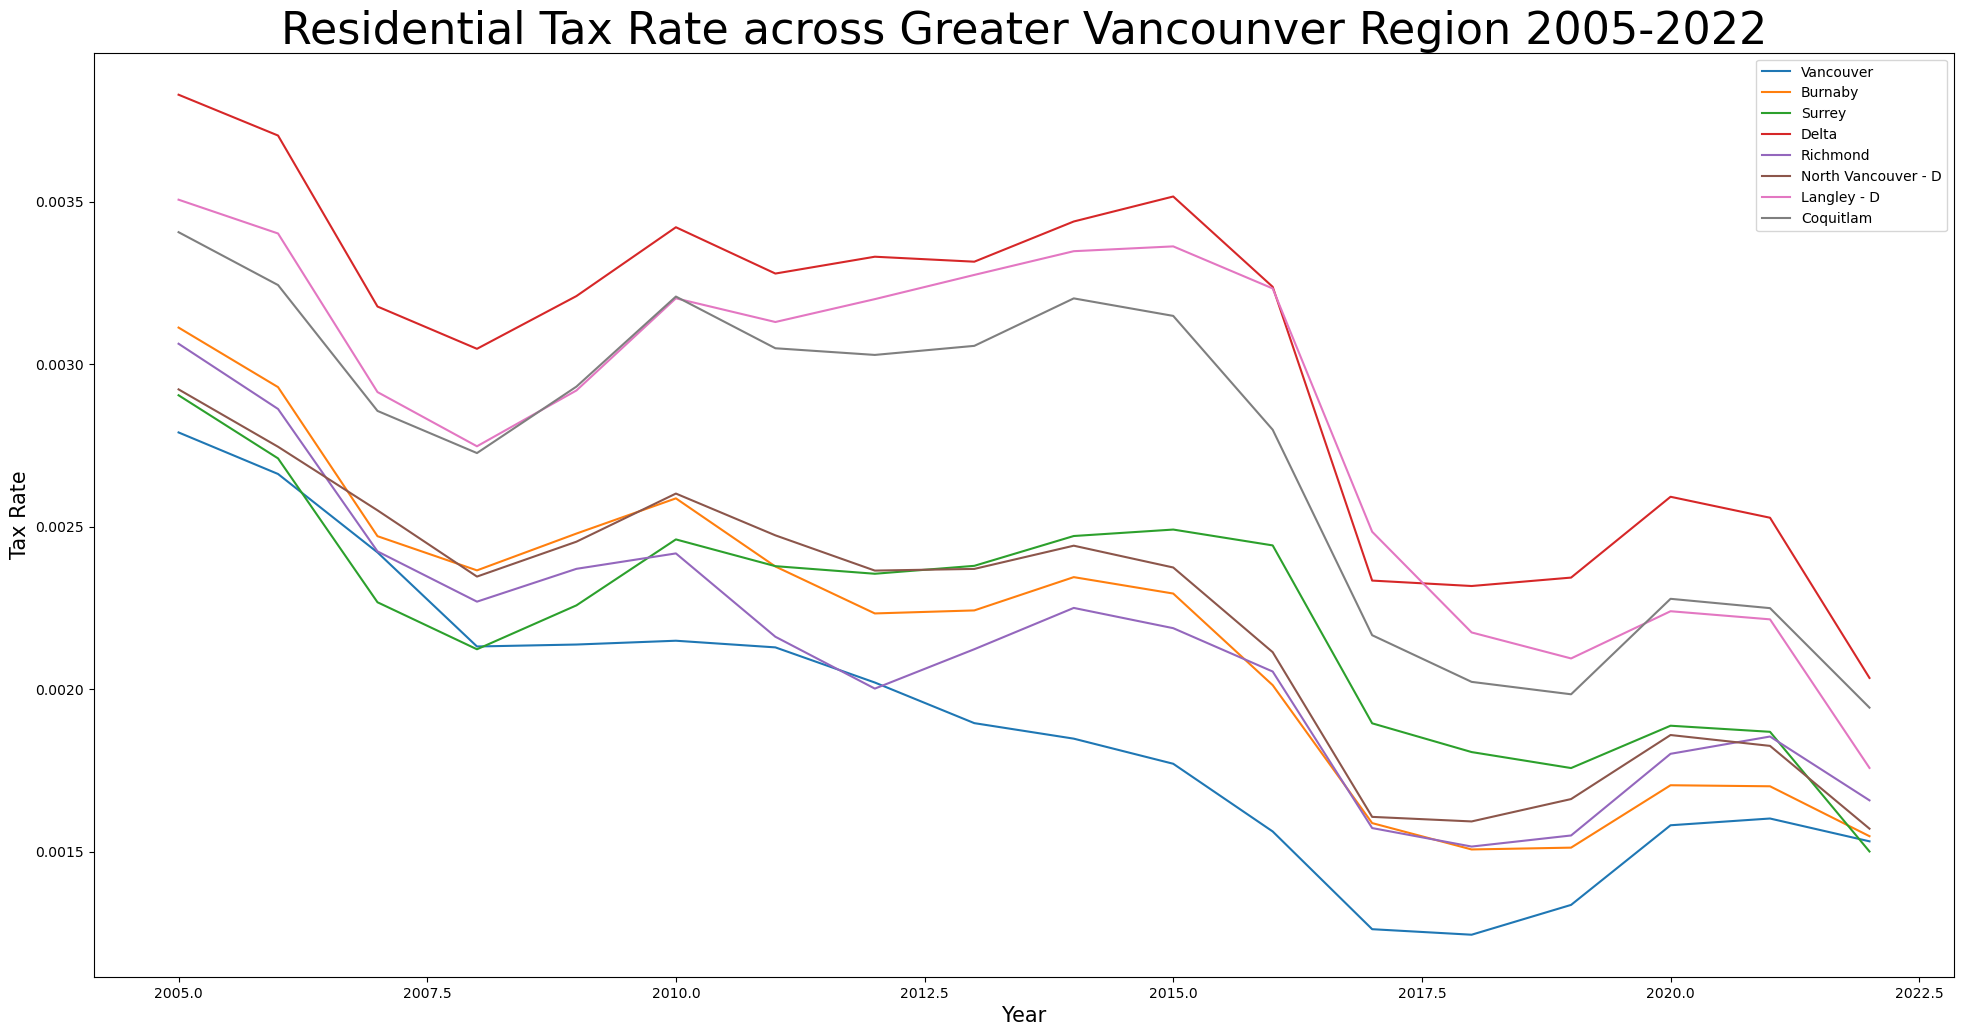

In [36]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = ['Vancouver', 'Burnaby', 'Surrey', 'Delta', 'Richmond', 'North Vancouver - D', 'Langley - D', 'Coquitlam']

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Residential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate across Select I Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()

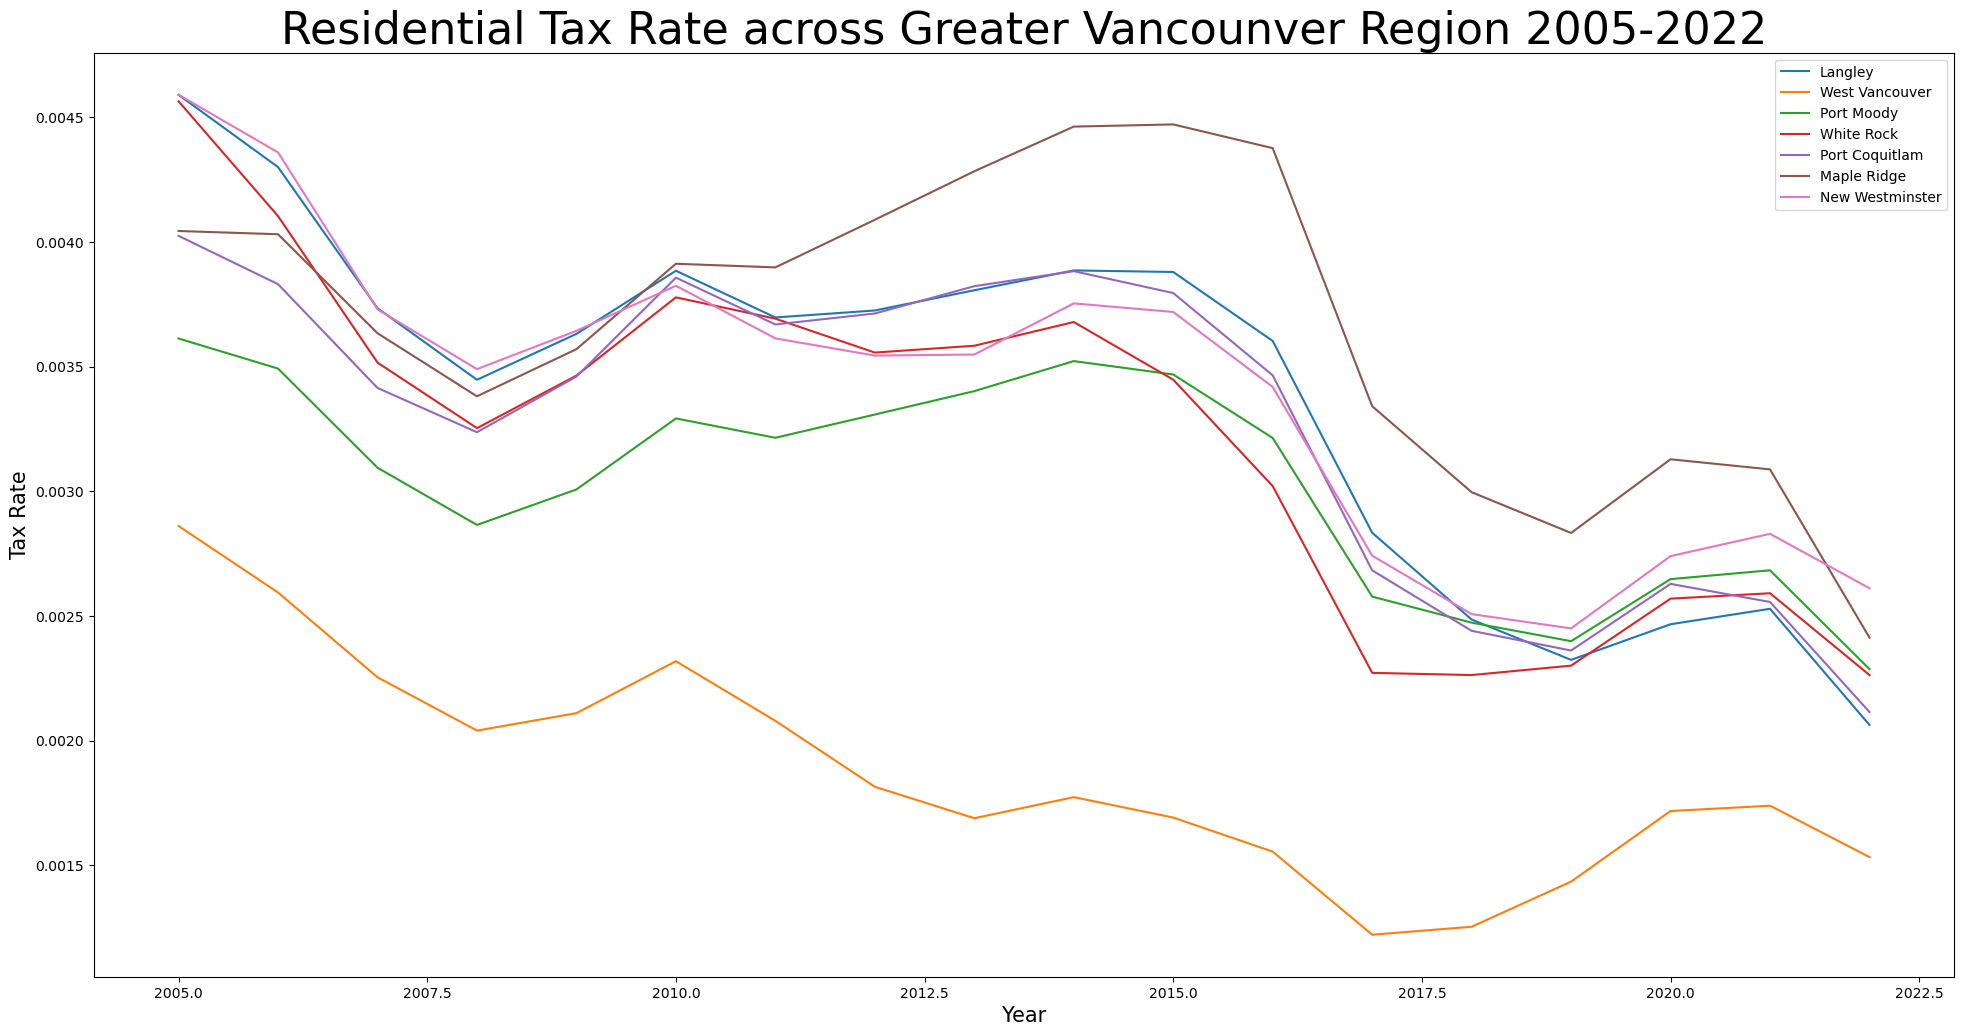

In [46]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = ['Langley', 'West Vancouver', 'Port Moody', 'White Rock', 'Port Coquitlam', 'Maple Ridge', 'New Westminster']

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Residential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate across Select II Greater Vancouver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()

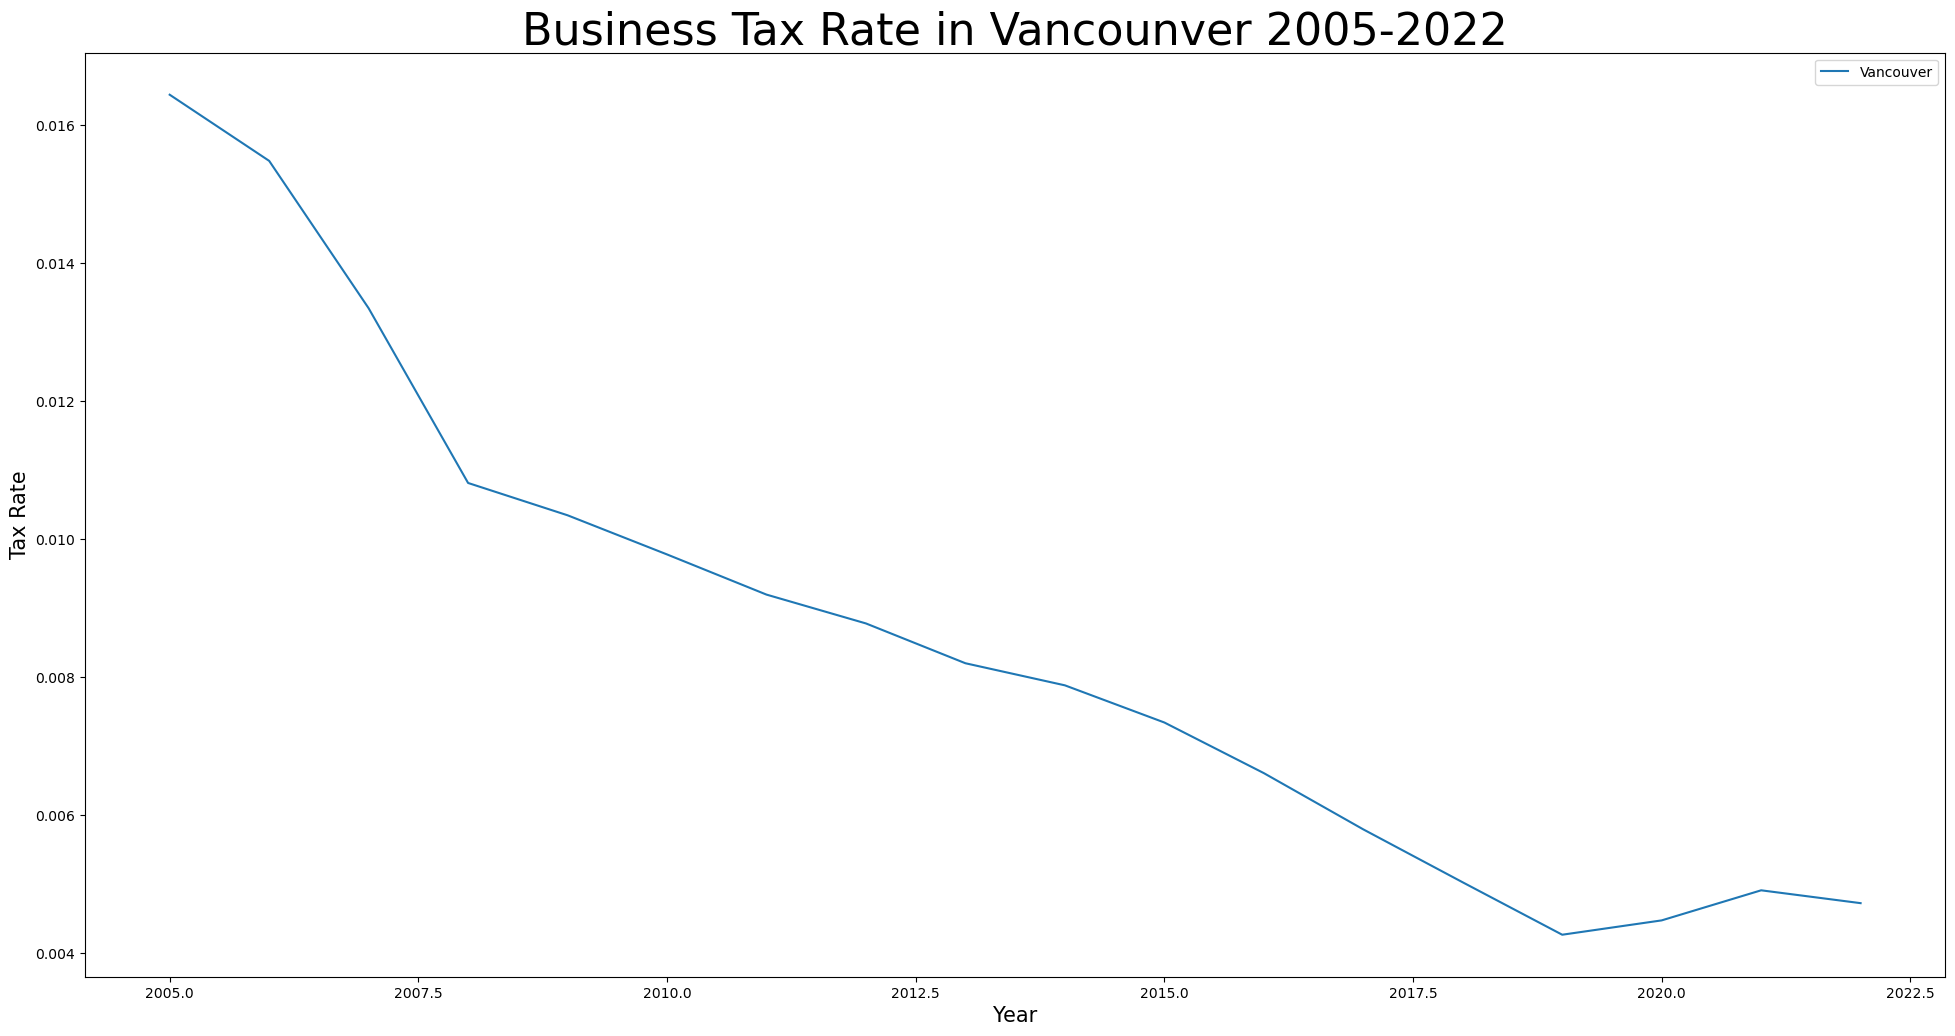

In [44]:
data=bc_ptax05_22[(bc_ptax05_22['Municipalities'] == 'Vancouver') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')][['Year', 'Business']]

plt.figure(figsize=(24,12))
plt.plot(data.iloc[:, 0], data.iloc[:,1], label='Vancouver')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Business Tax Rate in Vancounver 2005-2022', fontsize=32)
plt.legend()
plt.show()

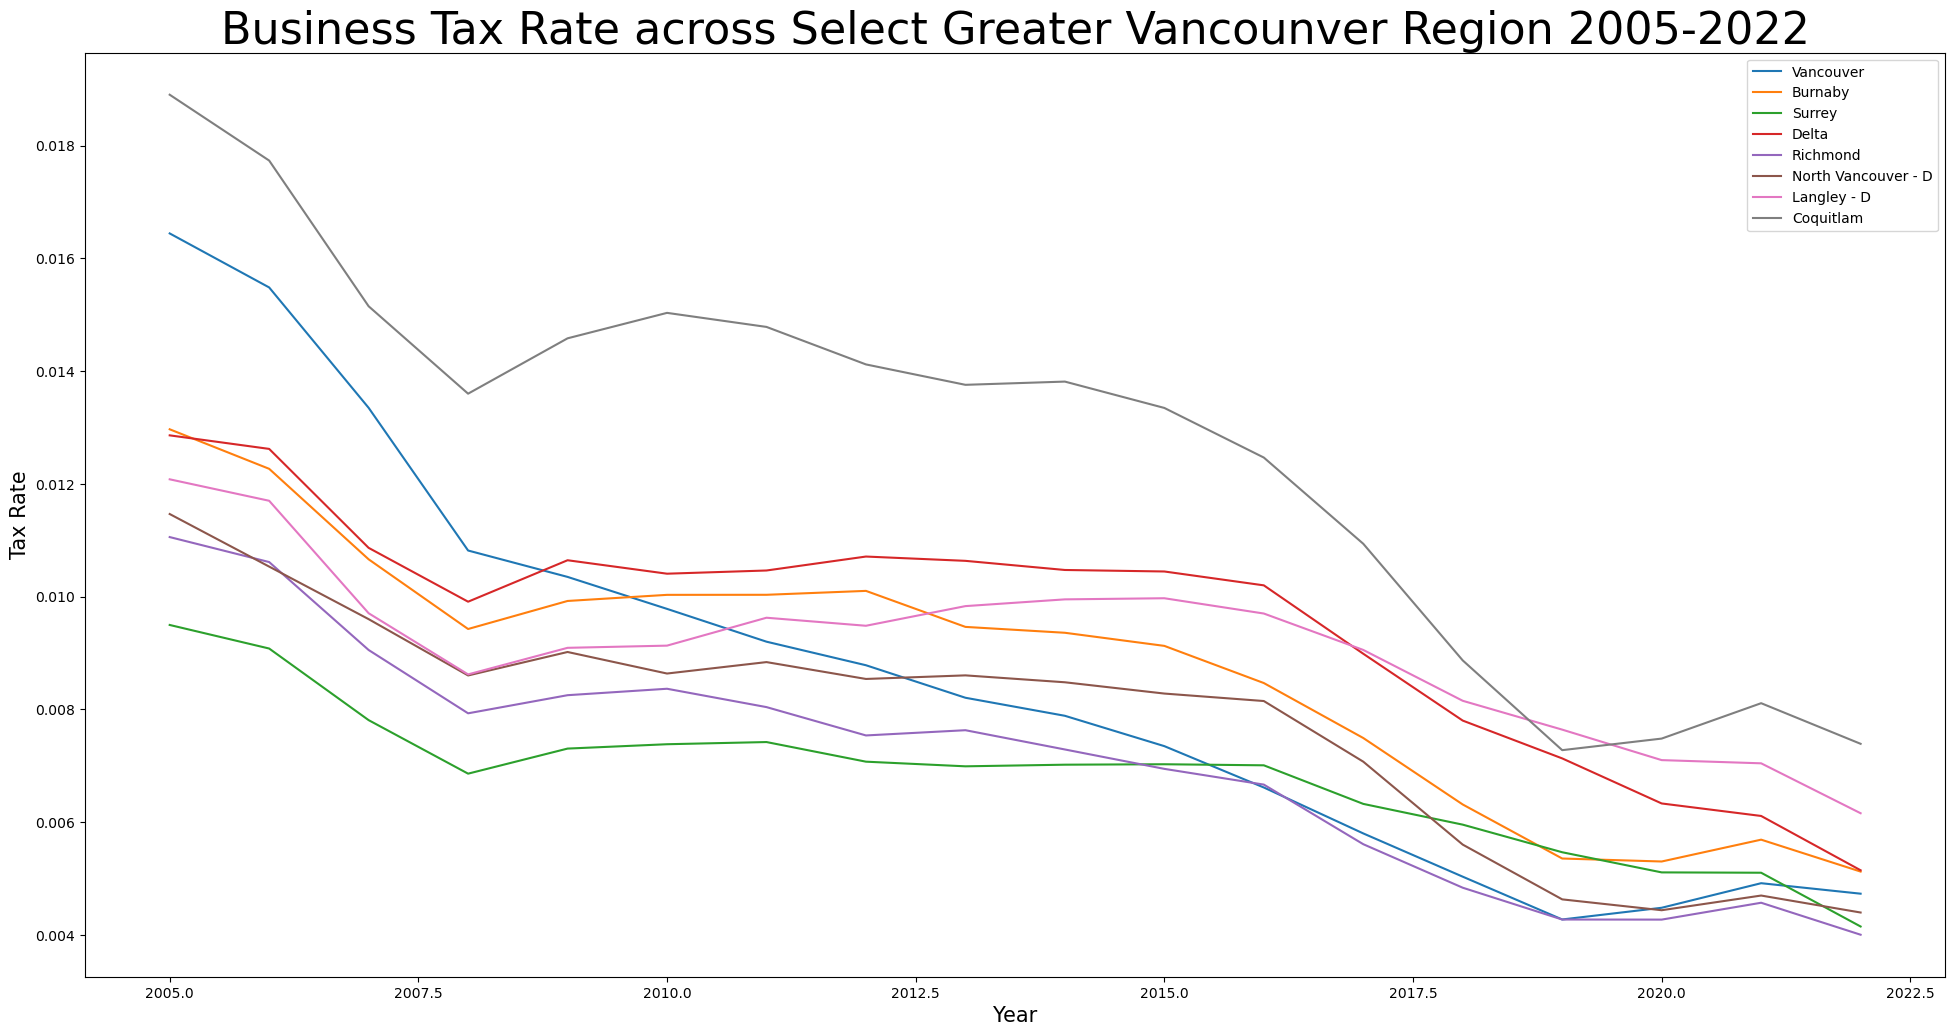

In [45]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = ['Vancouver', 'Burnaby', 'Surrey', 'Delta', 'Richmond', 'North Vancouver - D', 'Langley - D', 'Coquitlam']

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Business'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Business Tax Rate across Select I Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()

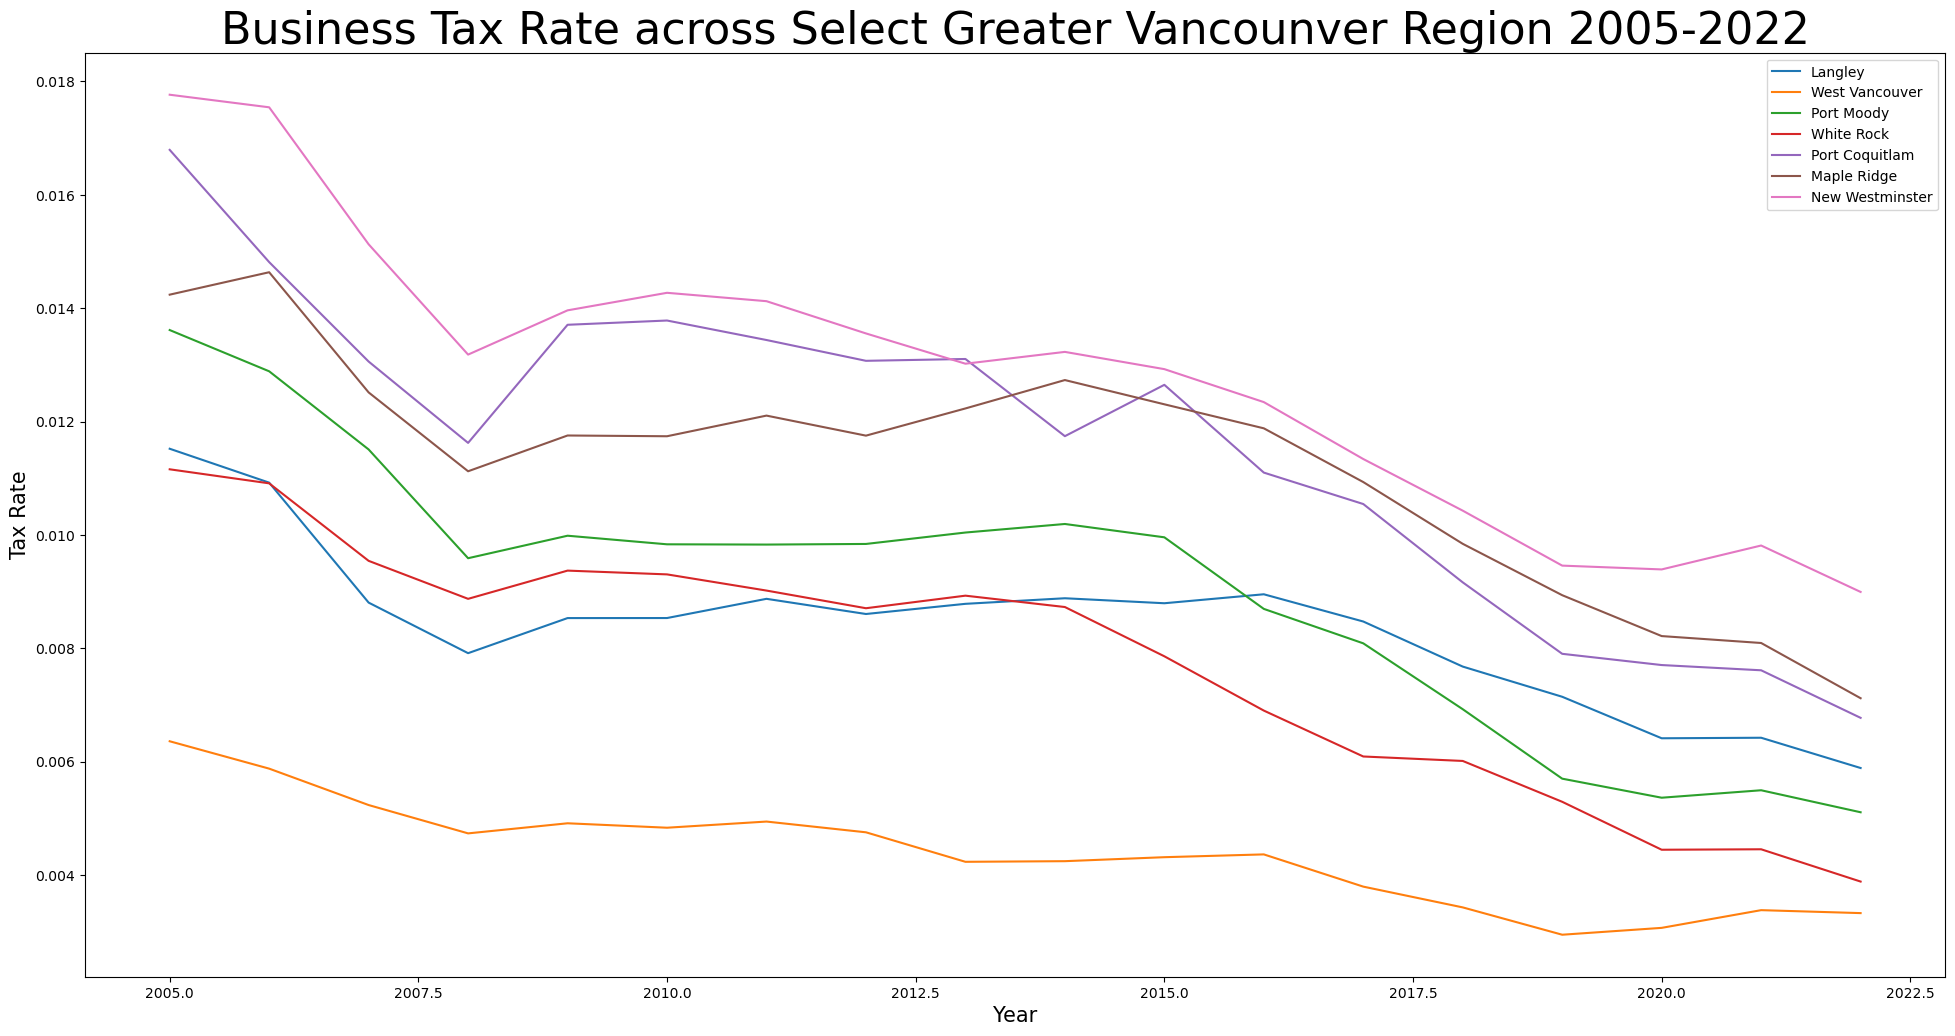

In [47]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = ['Langley', 'West Vancouver', 'Port Moody', 'White Rock', 'Port Coquitlam', 'Maple Ridge', 'New Westminster']

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Business'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Business Tax Rate across Select II Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()

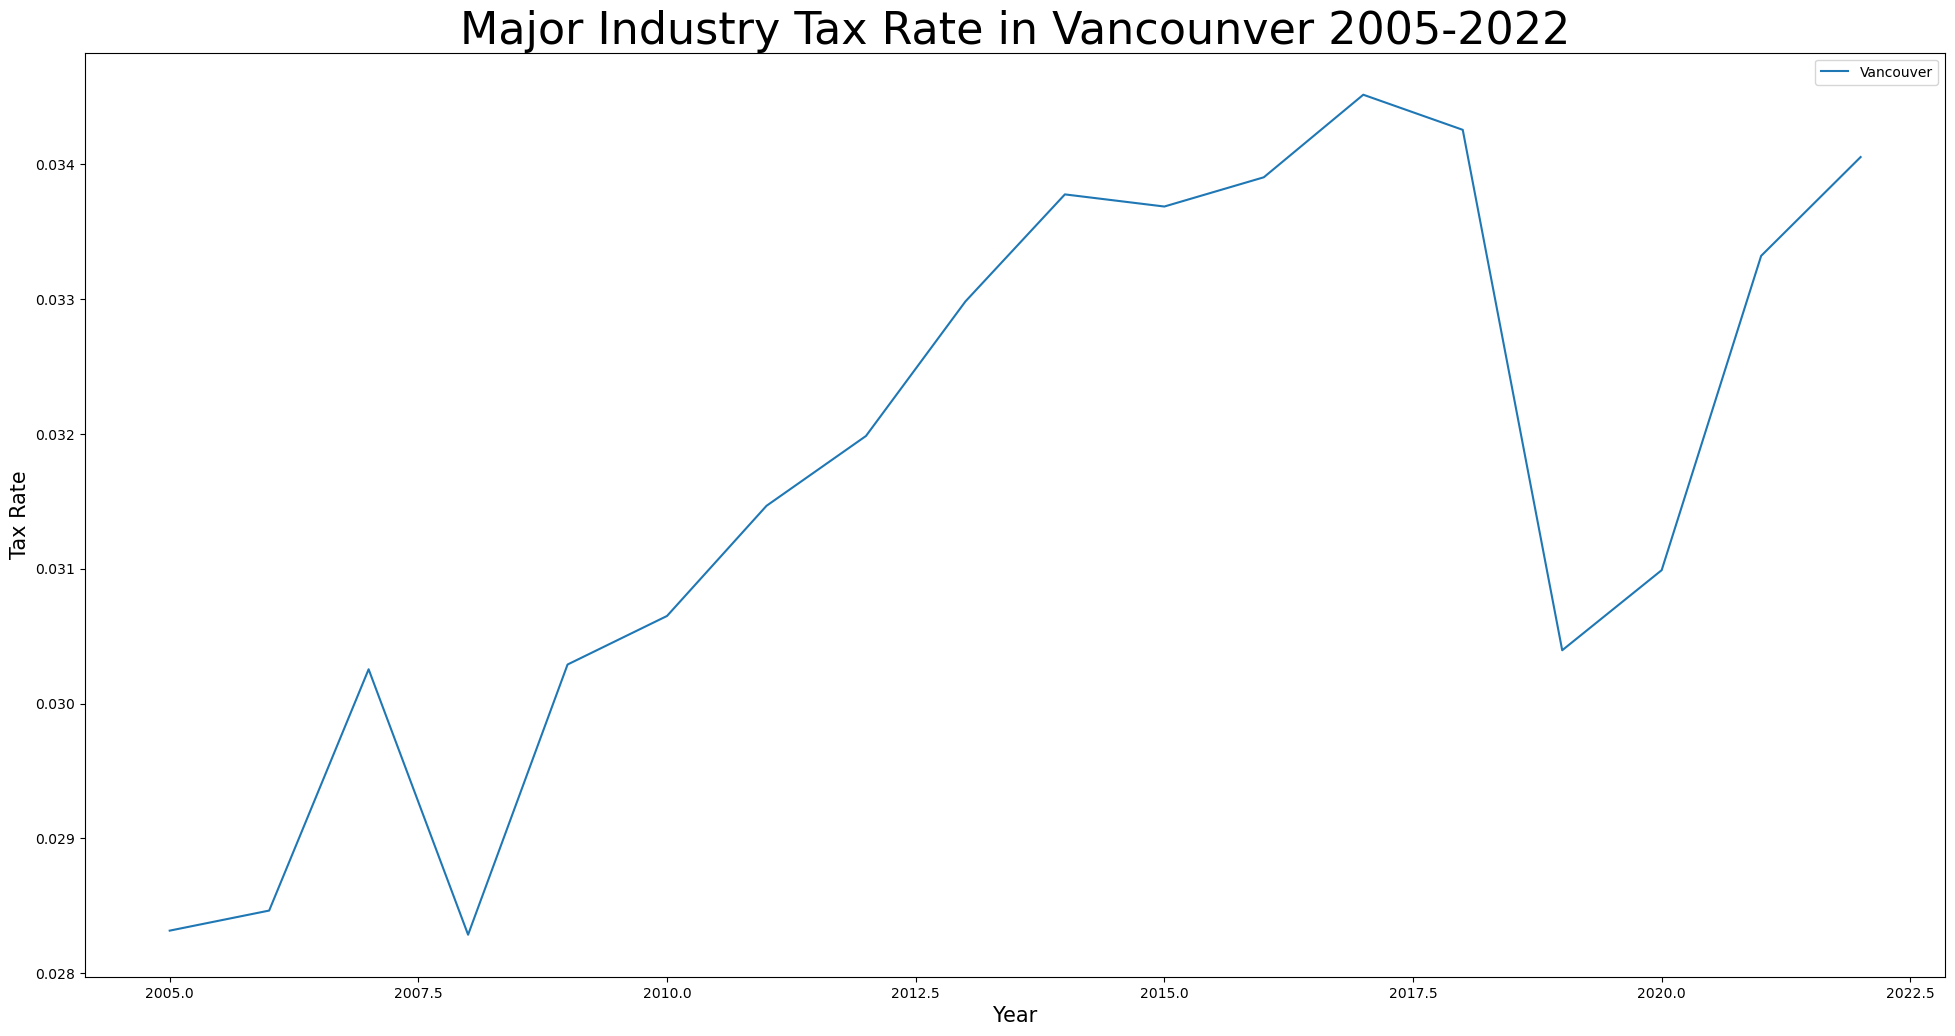

In [48]:
data=bc_ptax05_22[(bc_ptax05_22['Municipalities'] == 'Vancouver') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')][['Year', 'Major Industry']]

plt.figure(figsize=(24,12))
plt.plot(data.iloc[:, 0], data.iloc[:,1], label='Vancouver')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Major Industry Tax Rate in Vancounver 2005-2022', fontsize=32)
plt.legend()
plt.show()

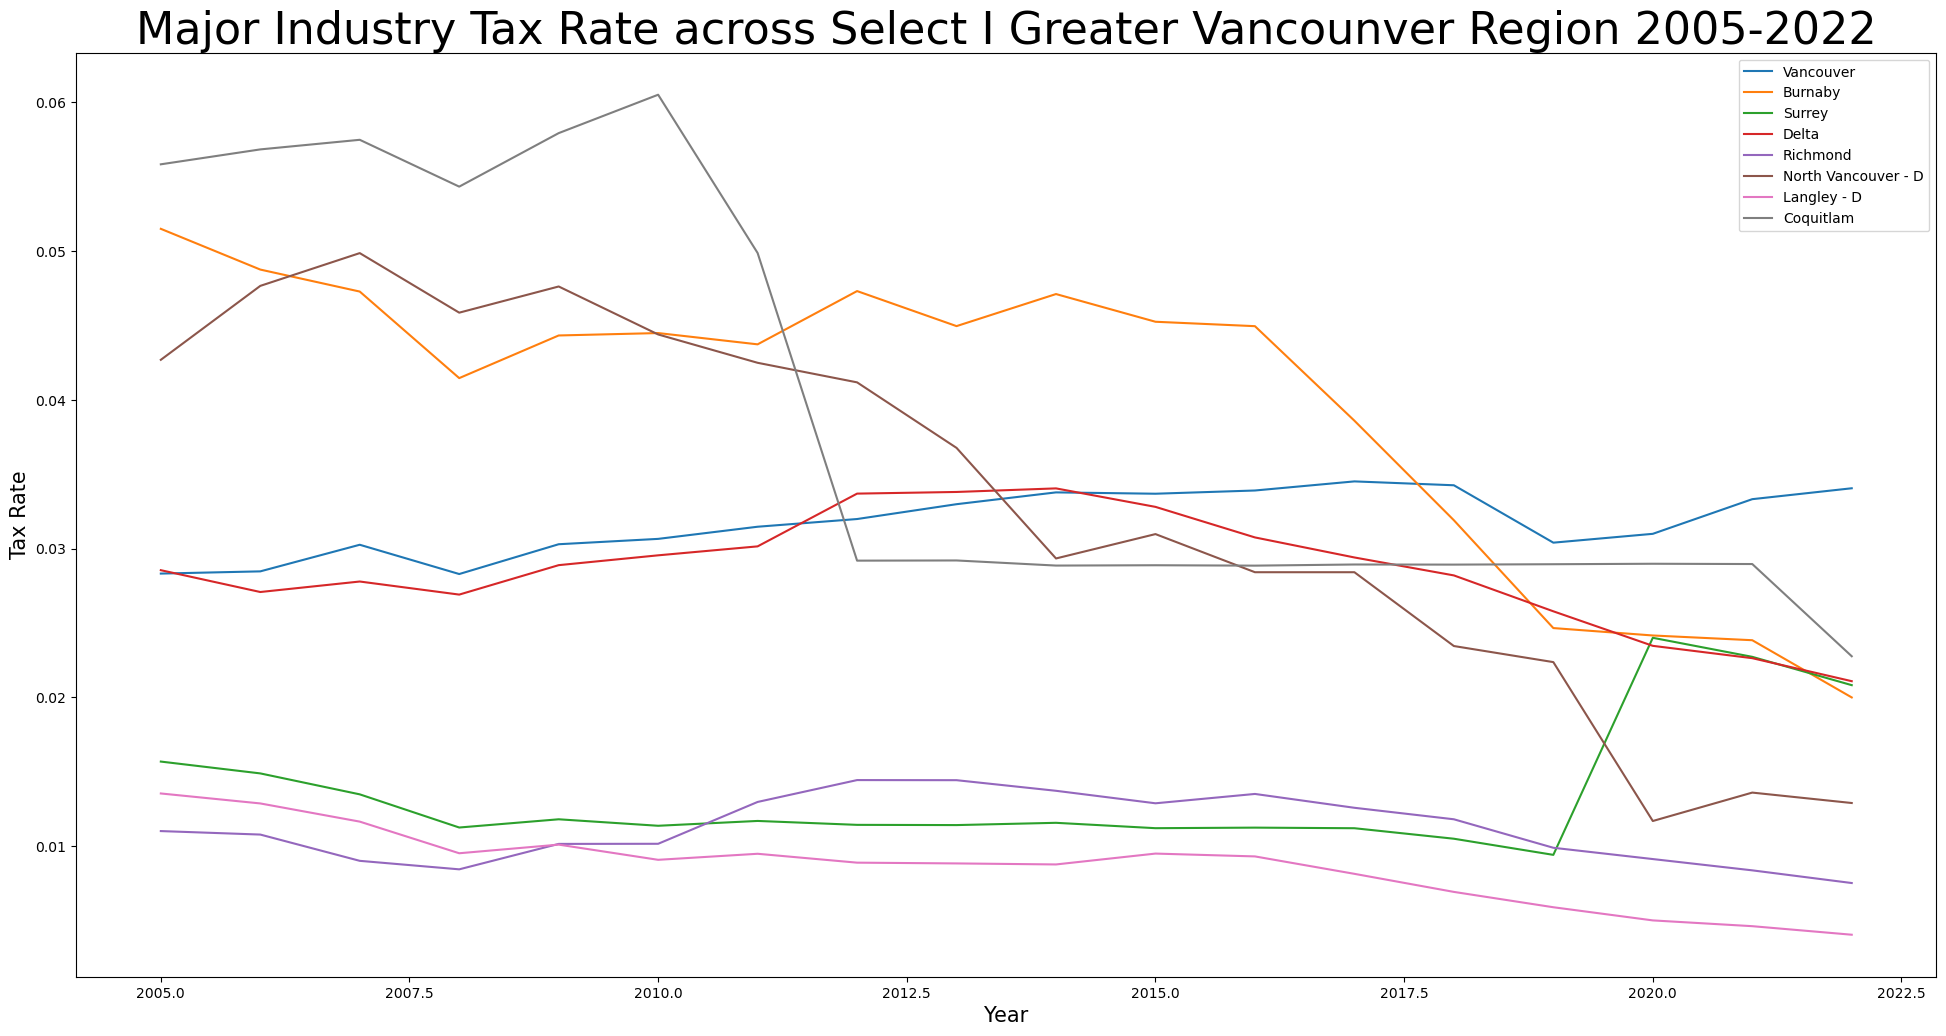

In [49]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = ['Vancouver', 'Burnaby', 'Surrey', 'Delta', 'Richmond', 'North Vancouver - D', 'Langley - D', 'Coquitlam']

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Major Industry'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Major Industry Tax Rate across Select I Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()

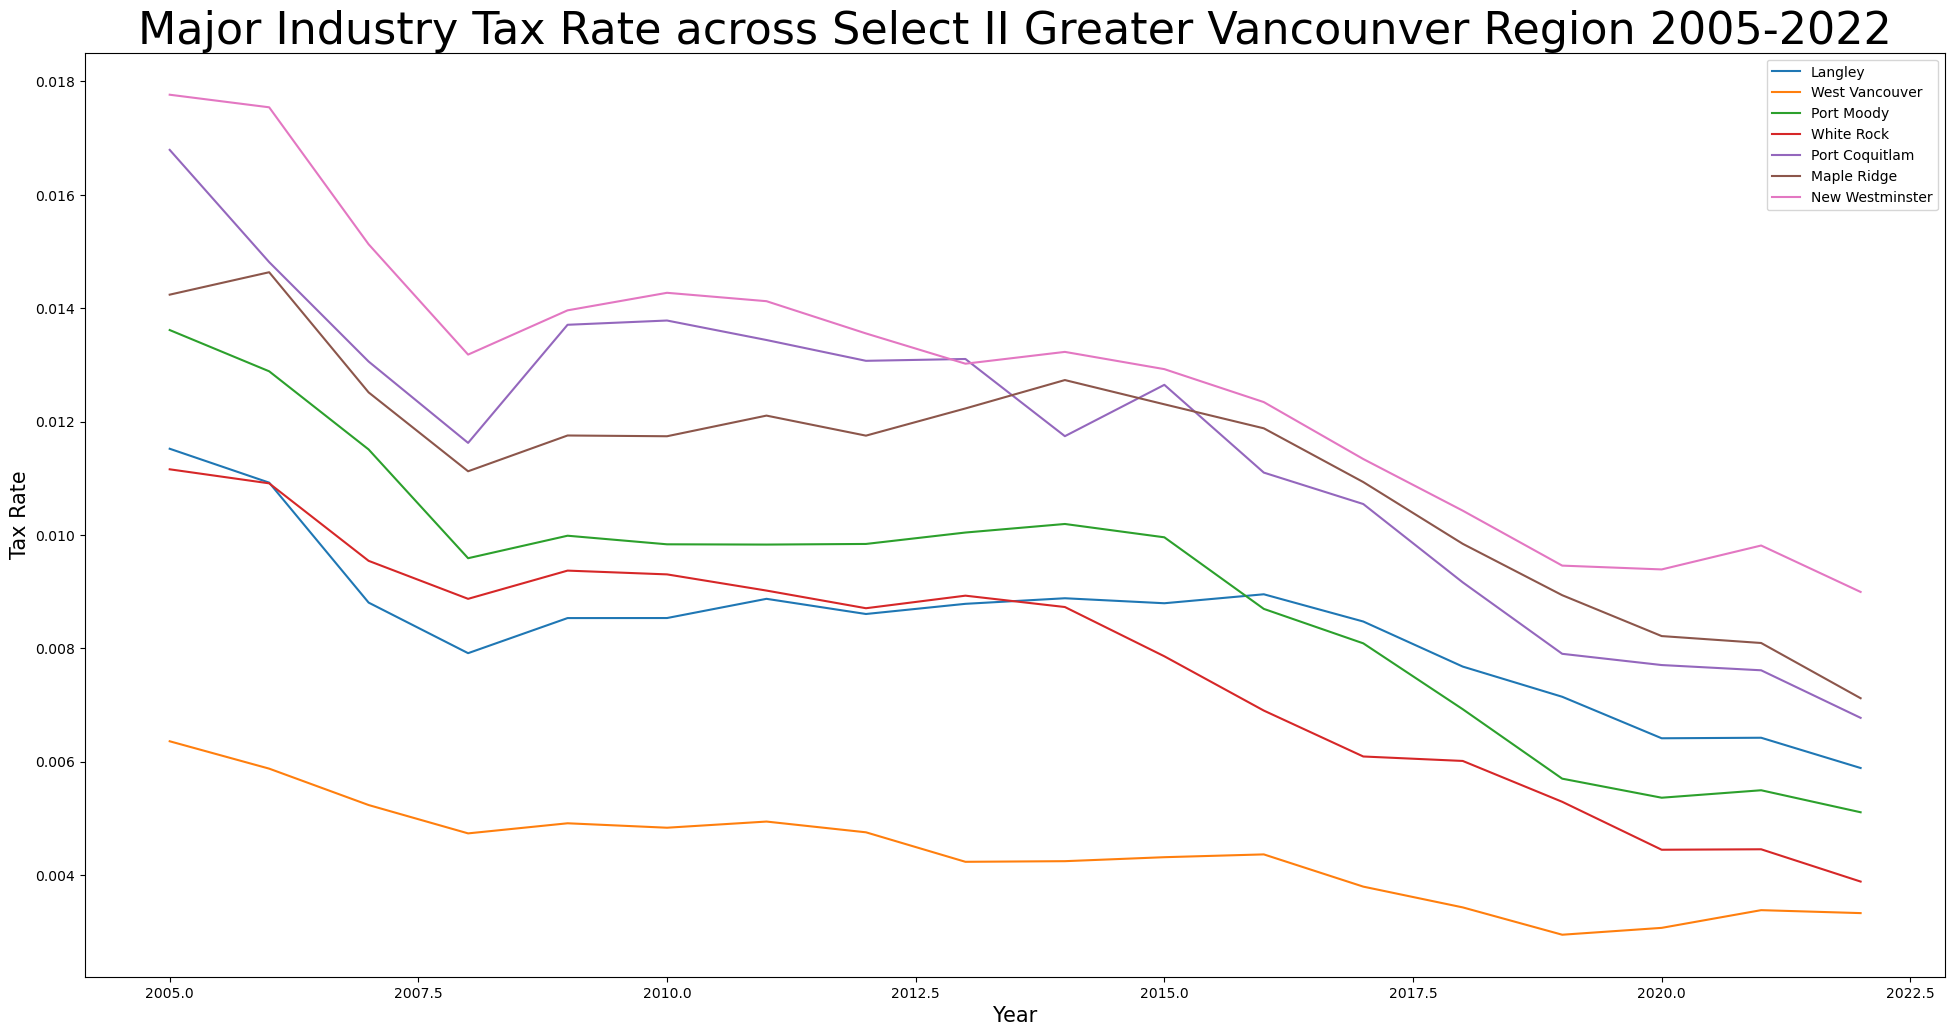

In [50]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = ['Langley', 'West Vancouver', 'Port Moody', 'White Rock', 'Port Coquitlam', 'Maple Ridge', 'New Westminster']

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Business'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Major Industry Tax Rate across Select II Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()

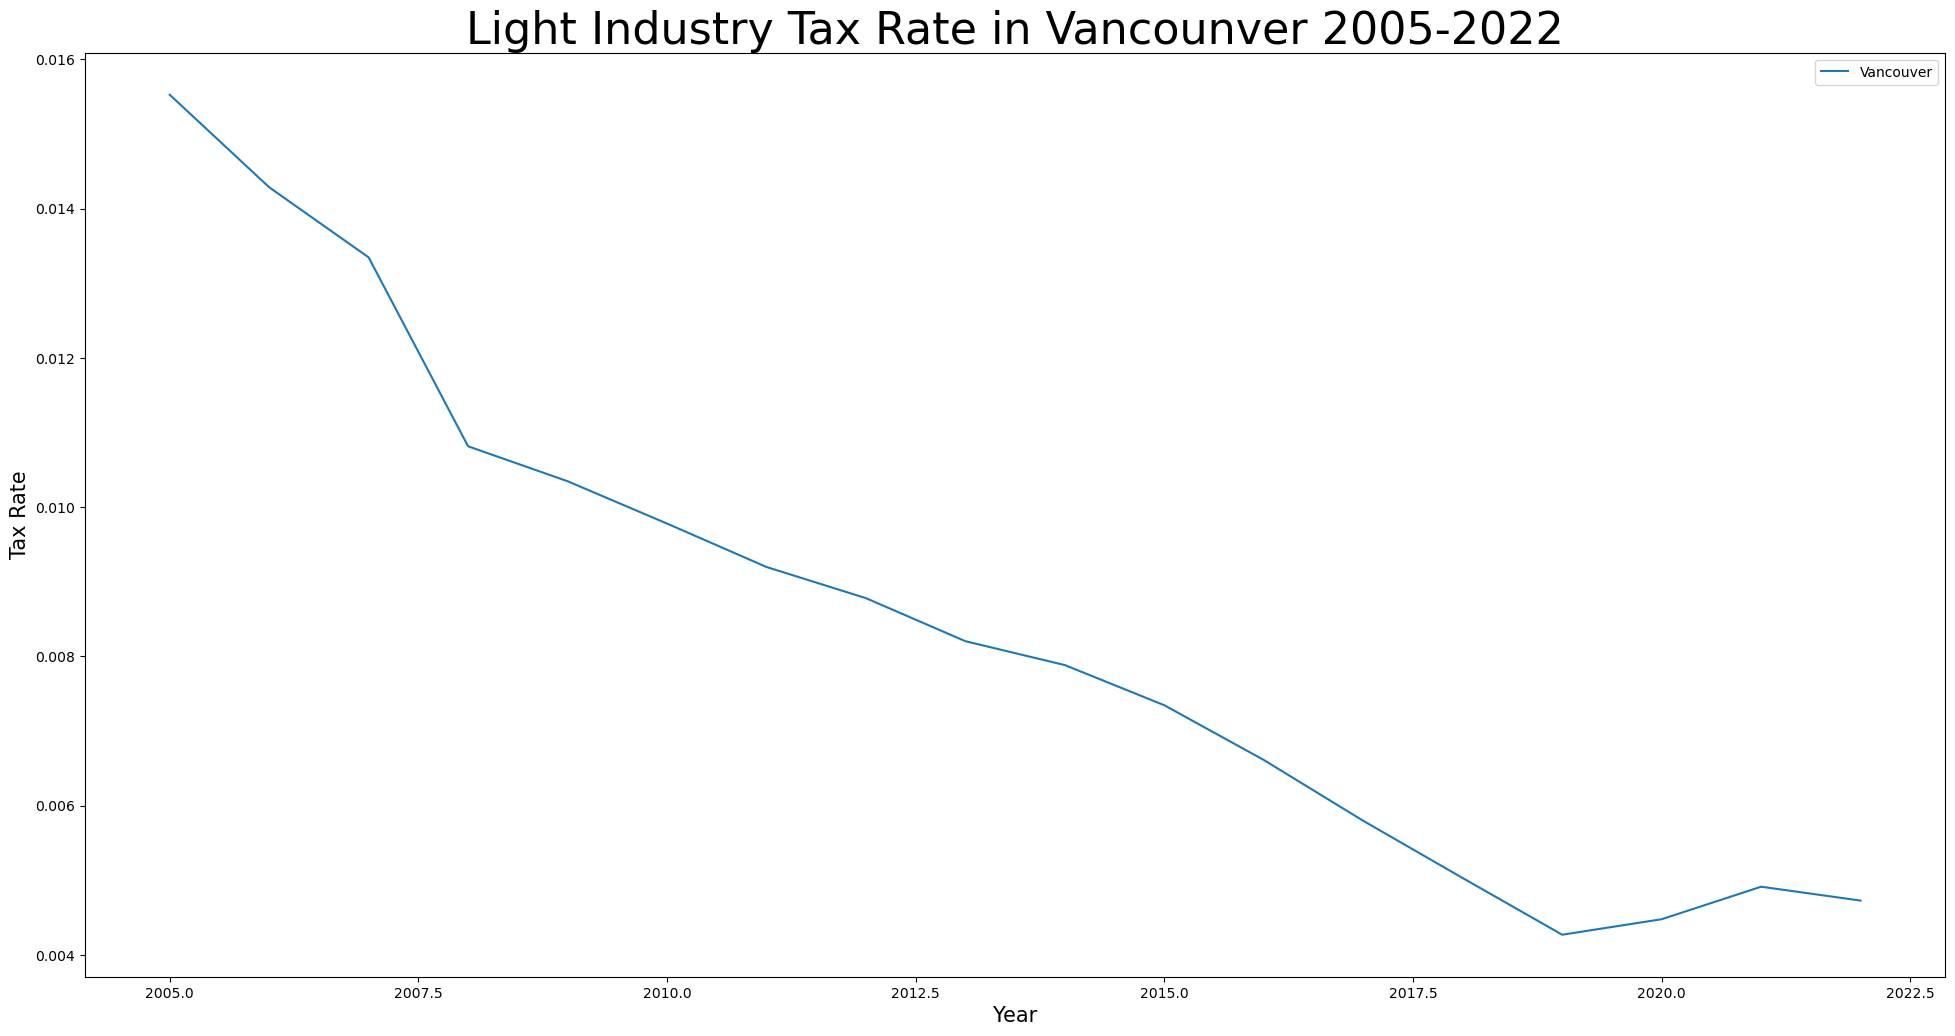

In [51]:
data=bc_ptax05_22[(bc_ptax05_22['Municipalities'] == 'Vancouver') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')][['Year', 'Light Industry']]

plt.figure(figsize=(24,12))
plt.plot(data.iloc[:, 0], data.iloc[:,1], label='Vancouver')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Light Industry Tax Rate in Vancounver 2005-2022', fontsize=32)
plt.legend()
plt.show()

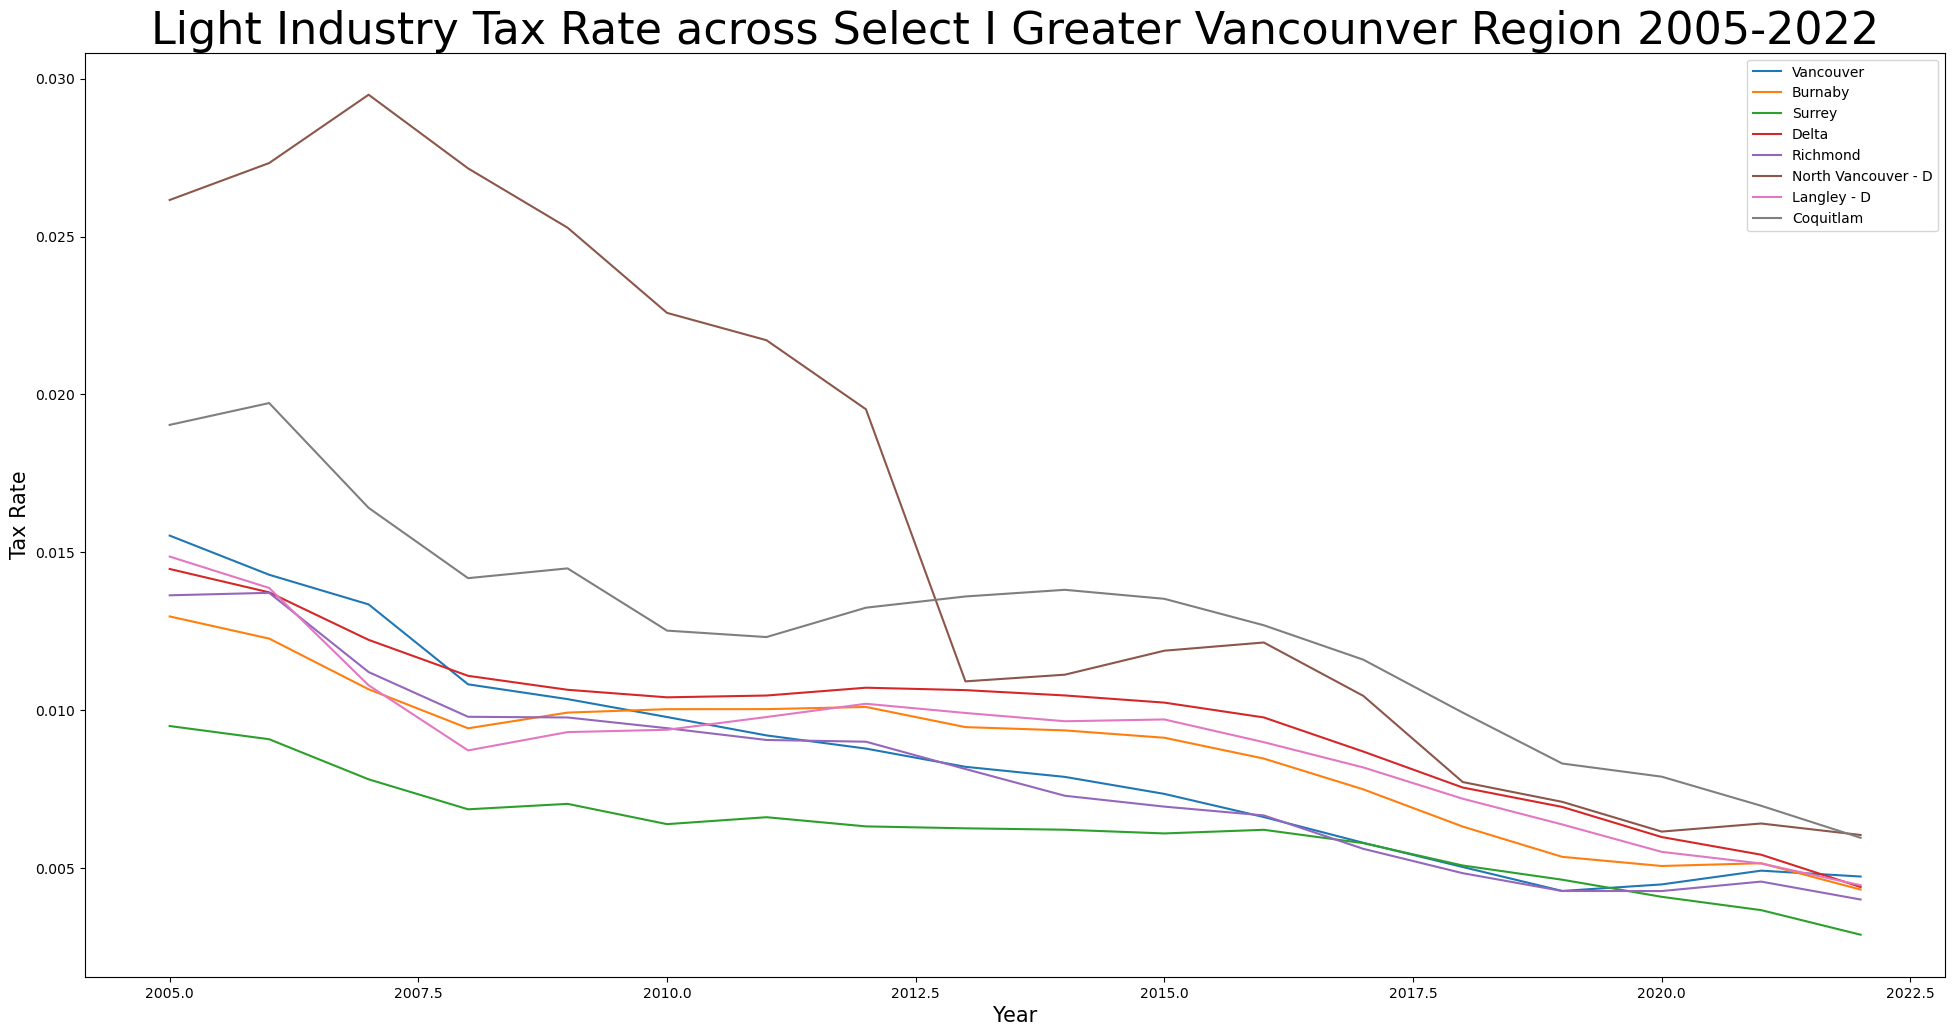

In [52]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = ['Vancouver', 'Burnaby', 'Surrey', 'Delta', 'Richmond', 'North Vancouver - D', 'Langley - D', 'Coquitlam']

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Light Industry'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Light Industry Tax Rate across Select I Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()

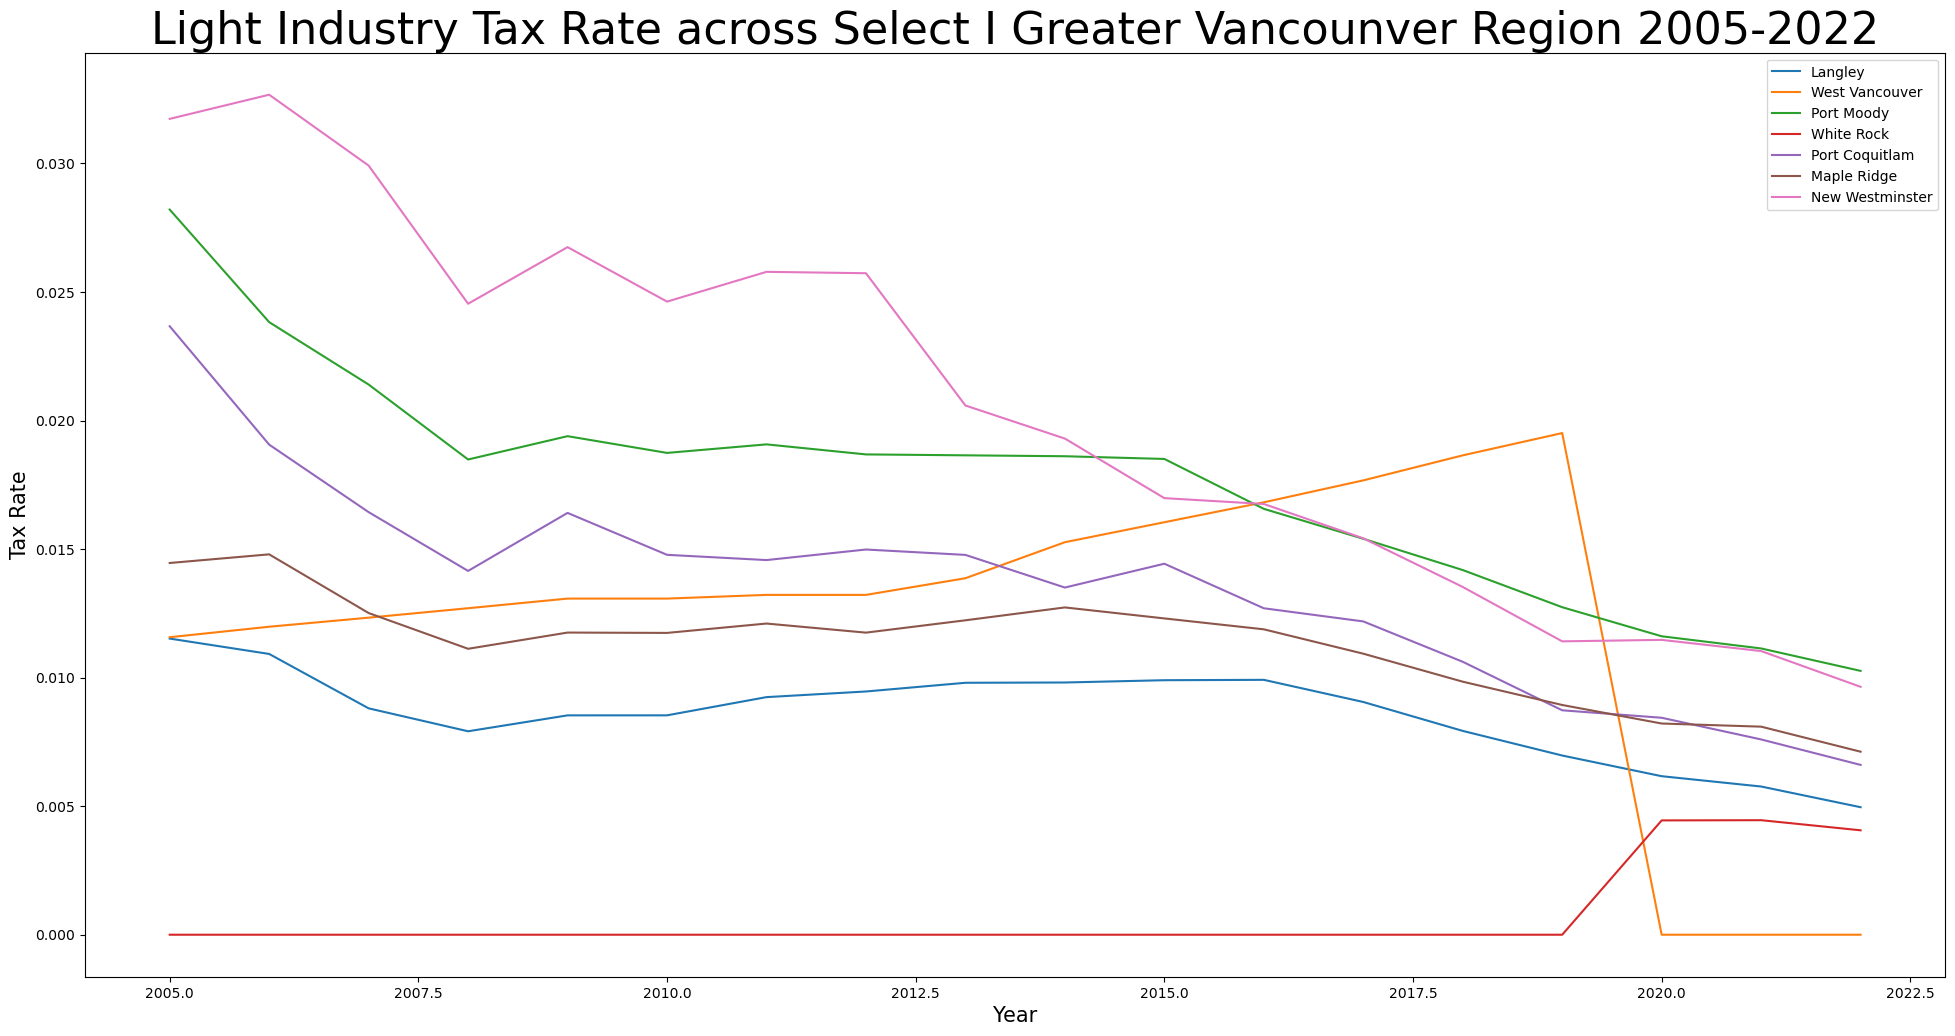

In [53]:
data = bc_ptax05_22[(bc_ptax05_22['RD'] == 'GVR') & (bc_ptax05_22['Purpose of Tax Rate'] == 'Municipal')]

cities = ['Langley', 'West Vancouver', 'Port Moody', 'White Rock', 'Port Coquitlam', 'Maple Ridge', 'New Westminster']

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipalities'] == city]['Year'], data[data['Municipalities'] == city]['Light Industry'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Light Industry Tax Rate across Select I Greater Vancounver Region 2005-2022', fontsize=32)
plt.legend()
plt.show()